# Tarea #3 - Big Data

María Yorleni Alfaro Alfaro


# Datos de entrada (5 puntos)
Los estudiantes podrán seleccionar un conjunto de datos de su preferencia. Es válido utilizar conjuntos de módulos anteriores aunque se espera que se provea una descripción de los datos, en el estilo que hemos utilizado en asignaciones anteriores. Debe incluir explícitamente cuál es la variable de predicción a utilizar.

Para efectos de la tarea se trabajará con el archivo winequality-red.csv ("Red Wine Quality" tomado de https://www.kaggle.com/uciml/red-wine-quality-cortez-et-al-2009), el cual contiene datos relevantes de diferentes cosecha de vinos tintos y su calidad (quality: valorado entre 0-10). 

Esta es la información (en inglés) de las columnas del dataset:

### Columns:
* <strong>fixed acidity</strong> most acids involved with wine or fixed or nonvolatile (do not evaporate readily).
* <strong>volatile acidity</strong> the amount of acetic acid in wine, which at too high of levels can lead to an unpleasant, vinegar taste.
* <strong>citric acid</strong> found in small quantities, citric acid can add 'freshness' and flavor to wines.
* <strong>residual sugar</strong> the amount of sugar remaining after fermentation stops, it's rare to find wines with less than 1 gram/liter and wines with greater than 45 grams/liter are considered sweet.
* <strong>chlorides</strong> the amount of salt in the wine.
* <strong>free sulfur dioxide</strong> the free form of SO2 exists in equilibrium between molecular SO2 (as a dissolved gas) and bisulfite ion; it prevents microbial growth and the oxidation of wine.
* <strong>total sulfur dioxide</strong> amount of free and bound forms of S02; in low concentrations, SO2 is mostly undetectable in wine, but at free SO2 concentrations over 50 ppm, SO2 becomes evident in the nose and taste of wine
* <strong>density</strong> the density of water is close to that of water depending on the percent alcohol and sugar content.
* <strong>pH</strong> describes how acidic or basic a wine is on a scale from 0 (very acidic) to 14 (very basic); most wines are between 3-4 on the pH scale.
* <strong>sulphates</strong> a wine additive which can contribute to sulfur dioxide gas (S02) levels, wich acts as an antimicrobial and antioxidant.
* <strong>alcohol</strong> the percent alcohol content of the wine
* <strong>quality</strong> output variable (based on sensory data, score between 0 and 10)


# Preprocesamiento de datos

## Cargado y limpieza de datos de archivo de entrada CSV
* Esto implica la definición del "schema" y muestras en el notebook que los datos se han cargado exitosamente 

In [20]:
# Cargar el conjunto de datos completo. Este paso no realiza ningún ajuste; simplemente lectura
import findspark
findspark.init('/usr/lib/python3.7/site-packages/pyspark')

from pyspark.sql.types import (StringType, IntegerType, FloatType, 
                               DecimalType, StructField, StructType)

from pyspark.sql import SparkSession

spark = SparkSession \
    .builder \
    .appName("Basic JDBC pipeline") \
    .config("spark.driver.extraClassPath", "postgresql-42.2.14.jar") \
    .config("spark.executor.extraClassPath", "postgresql-42.2.14.jar") \
    .getOrCreate()

df = spark \
    .read \
    .format("csv") \
    .option("path", "winequality-red.csv") \
    .option("header", True) \
    .schema(StructType([
                StructField("fixed acidity", FloatType()),
                StructField("volatile acidity", FloatType()),
                StructField("citric acid", FloatType()),
                StructField("residual sugar", FloatType()),
                StructField("chlorides", FloatType()),
                StructField("free sulfur dioxide", FloatType()),
                StructField("total sulfur dioxide", FloatType()),
                StructField("density", FloatType()),
                StructField("pH", FloatType()),
                StructField("sulphates", FloatType()),
                StructField("alcohol", FloatType()),
                StructField("quality", StringType())])) \
    .load()

print ("Definición del esquema:")
df.printSchema()

print ("Datos cargados exitosamente:")
df.show()


Definición del esquema:
root
 |-- fixed acidity: float (nullable = true)
 |-- volatile acidity: float (nullable = true)
 |-- citric acid: float (nullable = true)
 |-- residual sugar: float (nullable = true)
 |-- chlorides: float (nullable = true)
 |-- free sulfur dioxide: float (nullable = true)
 |-- total sulfur dioxide: float (nullable = true)
 |-- density: float (nullable = true)
 |-- pH: float (nullable = true)
 |-- sulphates: float (nullable = true)
 |-- alcohol: float (nullable = true)
 |-- quality: string (nullable = true)

Datos cargados exitosamente:
+-------------+----------------+-----------+--------------+---------+-------------------+--------------------+-------+----+---------+-------+-------+
|fixed acidity|volatile acidity|citric acid|residual sugar|chlorides|free sulfur dioxide|total sulfur dioxide|density|  pH|sulphates|alcohol|quality|
+-------------+----------------+-----------+--------------+---------+-------------------+--------------------+-------+----+---------+-

In [21]:
# Seleccionar un subconjunto de las columnas de interés (en este caso se seleccionan todas) y el objectivo que es quality
columns_kept = ['fixed acidity','volatile acidity','citric acid','residual sugar','chlorides',
                'free sulfur dioxide','total sulfur dioxide','density','pH','sulphates','alcohol','quality']

selected_columns_df = df.select(columns_kept)

selected_columns_df.show()

+-------------+----------------+-----------+--------------+---------+-------------------+--------------------+-------+----+---------+-------+-------+
|fixed acidity|volatile acidity|citric acid|residual sugar|chlorides|free sulfur dioxide|total sulfur dioxide|density|  pH|sulphates|alcohol|quality|
+-------------+----------------+-----------+--------------+---------+-------------------+--------------------+-------+----+---------+-------+-------+
|          7.4|             0.7|        0.0|           1.9|    0.076|               11.0|                34.0| 0.9978|3.51|     0.56|    9.4|      5|
|          7.8|            0.88|        0.0|           2.6|    0.098|               25.0|                67.0| 0.9968| 3.2|     0.68|    9.8|      5|
|          7.8|            0.76|       0.04|           2.3|    0.092|               15.0|                54.0|  0.997|3.26|     0.65|    9.8|      5|
|         11.2|            0.28|       0.56|           1.9|    0.075|               17.0|           

In [22]:
# quantity fue cargada como string. Debe ajustarse a integer.
correct_types_df = selected_columns_df \
    .withColumn('quality', selected_columns_df['quality'].cast(IntegerType())) \

correct_types_df.printSchema()

root
 |-- fixed acidity: float (nullable = true)
 |-- volatile acidity: float (nullable = true)
 |-- citric acid: float (nullable = true)
 |-- residual sugar: float (nullable = true)
 |-- chlorides: float (nullable = true)
 |-- free sulfur dioxide: float (nullable = true)
 |-- total sulfur dioxide: float (nullable = true)
 |-- density: float (nullable = true)
 |-- pH: float (nullable = true)
 |-- sulphates: float (nullable = true)
 |-- alcohol: float (nullable = true)
 |-- quality: integer (nullable = true)



## Gráficos y estadísticas descriptivas previo al entrenamiento

### Estadísticas descriptivas

In [23]:
# Información descriptiva del dataframe.
correct_types_df.describe(['fixed acidity','volatile acidity','citric acid','residual sugar']).show()
correct_types_df.describe(['chlorides','free sulfur dioxide','total sulfur dioxide','density']).show()
correct_types_df.describe(['pH','sulphates','alcohol','quality']).show()

#selected_columns_df.describe(['fixed acidity','volatile acidity','citric acid','residual sugar','chlorides',
#                'free sulfur dioxide','total sulfur dioxide','density','pH','sulphates','alcohol','quality']).show()
  

+-------+------------------+-------------------+-------------------+------------------+
|summary|     fixed acidity|   volatile acidity|        citric acid|    residual sugar|
+-------+------------------+-------------------+-------------------+------------------+
|  count|              1599|               1599|               1599|              1599|
|   mean|  8.31963727204333| 0.5278205118742565|0.27097560946082344|2.5388054955072743|
| stddev|1.7410963179910275|0.17905970357107073|0.19480113735645493|1.4099280590834145|
|    min|               4.6|               0.12|                0.0|               0.9|
|    max|              15.9|               1.58|                1.0|              15.5|
+-------+------------------+-------------------+-------------------+------------------+

+-------+-------------------+-------------------+--------------------+--------------------+
|summary|          chlorides|free sulfur dioxide|total sulfur dioxide|             density|
+-------+--------------

### Histogramas

Histograma para la columna: fixed acidity


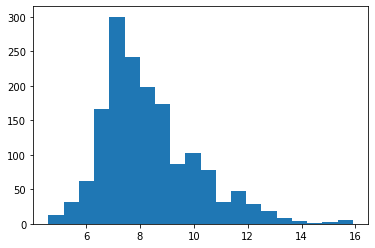

Histograma para la columna: volatile acidity


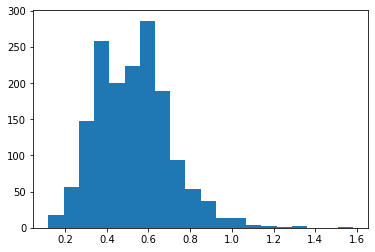

Histograma para la columna: citric acid


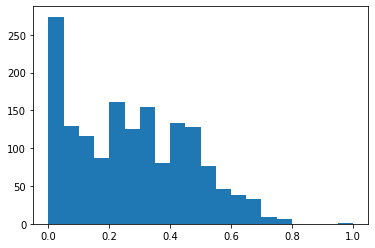

Histograma para la columna: residual sugar


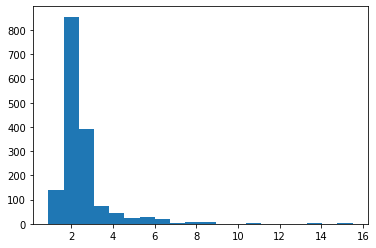

Histograma para la columna: chlorides


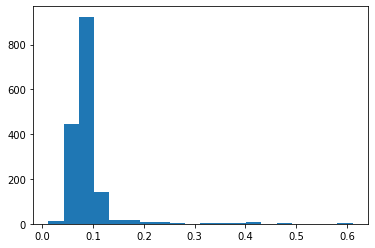

Histograma para la columna: free sulfur dioxide


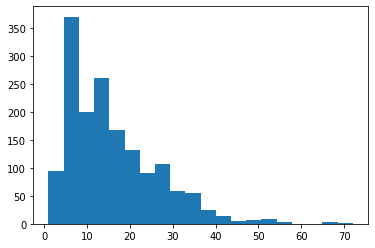

Histograma para la columna: total sulfur dioxide


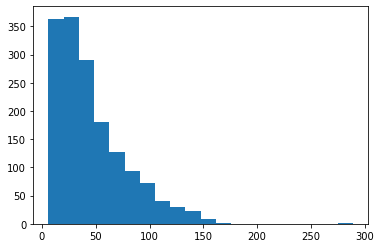

Histograma para la columna: density


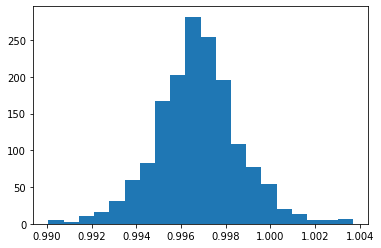

Histograma para la columna: pH


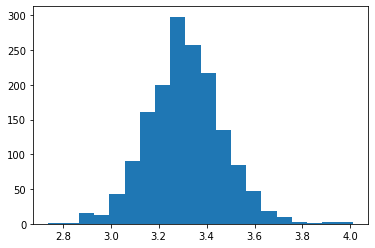

Histograma para la columna: sulphates


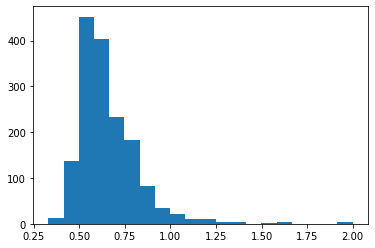

Histograma para la columna: alcohol


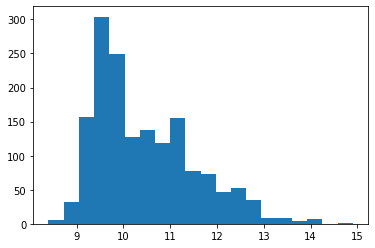

Histograma para la columna: quality


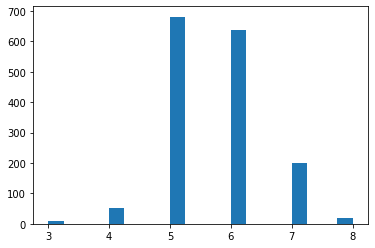

In [24]:
import matplotlib.pyplot as plt

def HistogramaColumnas(columns, df):
    for col in columns:
        print("Histograma para la columna:", col)
        bins, counts = df.select(col).rdd.flatMap(lambda x: x).histogram(20)
        plt.hist(bins[:-1], bins=bins, weights=counts)
        plt.show()
    
HistogramaColumnas(columns_kept, correct_types_df)  

### Correlaciones

+--------------------+-------+
|            features|quality|
+--------------------+-------+
|[7.40000009536743...|      5|
|[7.80000019073486...|      5|
|[7.80000019073486...|      5|
|[11.1999998092651...|      6|
|[7.40000009536743...|      5|
|[7.40000009536743...|      5|
|[7.90000009536743...|      5|
|[7.30000019073486...|      7|
|[7.80000019073486...|      7|
|[7.5,0.5,0.360000...|      5|
|[6.69999980926513...|      5|
|[7.5,0.5,0.360000...|      5|
|[5.59999990463256...|      5|
|[7.80000019073486...|      5|
|[8.89999961853027...|      5|
|[8.89999961853027...|      5|
|[8.5,0.2800000011...|      7|
|[8.10000038146972...|      5|
|[7.40000009536743...|      4|
|[7.90000009536743...|      6|
+--------------------+-------+
only showing top 20 rows

Matriz de correlación de Pearson:


<AxesSubplot:>

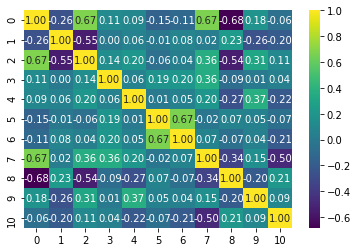

In [25]:
# Para realizar operaciones más detalladas es necesario expresar las filas originales en vectores
from pyspark.ml.feature import VectorAssembler

assembler = VectorAssembler(
    inputCols=['fixed acidity','volatile acidity','citric acid','residual sugar','chlorides',
               'free sulfur dioxide','total sulfur dioxide','density','pH','sulphates','alcohol'],
    outputCol='features')

vector_df = assembler.transform(correct_types_df)
vector_df = vector_df.select(['features', 'quality'])
vector_df.show()

# Con la representación de vectores podemos calcular correlaciones
from pyspark.ml.stat import Correlation
import seaborn as sns
import matplotlib.pyplot as plt

pearson_matrix = Correlation.corr(vector_df, 'features').collect()[0][0]
print("Matriz de correlación de Pearson:")
sns.heatmap(pearson_matrix.toArray(), annot=True, fmt=".2f", cmap='viridis')


## Normalización / Estandarización

In [26]:
# Es deseable que los datos se encuentren estandarizados o normalizados, para evitar que la magnitud de ciertos atributos dominen el proceso de entrenamiento. 
# El módulo pyspark.ml.feature tiene varias alternativas. En este caso se usa StandardScaler.
from pyspark.ml.feature import StandardScaler

standard_scaler = StandardScaler(inputCol='features', outputCol='scaled')
scale_model = standard_scaler.fit(vector_df)

scaled_df = scale_model.transform(vector_df)
print("Datos estandarizados:")
scaled_df.show()

Datos estandarizados:
+--------------------+-------+--------------------+
|            features|quality|              scaled|
+--------------------+-------+--------------------+
|[7.40000009536743...|      5|[4.25019570652240...|
|[7.80000019073486...|      5|[4.47993606679665...|
|[7.80000019073486...|      5|[4.47993606679665...|
|[11.1999998092651...|      6|[6.43272844444832...|
|[7.40000009536743...|      5|[4.25019570652240...|
|[7.40000009536743...|      5|[4.25019570652240...|
|[7.90000009536743...|      5|[4.53737108839727...|
|[7.30000019073486...|      7|[4.19276068492178...|
|[7.80000019073486...|      7|[4.47993606679665...|
|[7.5,0.5,0.360000...|      5|[4.30763072812302...|
|[6.69999980926513...|      5|[3.84815000757451...|
|[7.5,0.5,0.360000...|      5|[4.30763072812302...|
|[5.59999990463256...|      5|[3.21636422222416...|
|[7.80000019073486...|      5|[4.47993606679665...|
|[8.89999961853027...|      5|[5.11172157827522...|
|[8.89999961853027...|      5|[5.111721578

## Escritura a base de datos


In [43]:
# Una vez que los datos fueron depurados se procede a escribir el conjunto de datos que se utilizará como base para el entrenamiento, a una tabla llamada tarea3 (con overwrite).
correct_types_df \
    .write \
    .mode("overwrite") \
    .format("jdbc") \
    .option("url", "jdbc:postgresql://host.docker.internal:5433/postgres") \
    .option("user", "postgres") \
    .option("password", "testPassword") \
    .option("dbtable", "tarea3") \
    .save()

Py4JJavaError: An error occurred while calling o1122.save.
: java.sql.SQLException: No suitable driver
	at java.sql/java.sql.DriverManager.getDriver(DriverManager.java:298)
	at org.apache.spark.sql.execution.datasources.jdbc.JDBCOptions.$anonfun$driverClass$2(JDBCOptions.scala:108)
	at scala.Option.getOrElse(Option.scala:189)
	at org.apache.spark.sql.execution.datasources.jdbc.JDBCOptions.<init>(JDBCOptions.scala:108)
	at org.apache.spark.sql.execution.datasources.jdbc.JdbcOptionsInWrite.<init>(JDBCOptions.scala:215)
	at org.apache.spark.sql.execution.datasources.jdbc.JdbcOptionsInWrite.<init>(JDBCOptions.scala:219)
	at org.apache.spark.sql.execution.datasources.jdbc.JdbcRelationProvider.createRelation(JdbcRelationProvider.scala:45)
	at org.apache.spark.sql.execution.datasources.SaveIntoDataSourceCommand.run(SaveIntoDataSourceCommand.scala:46)
	at org.apache.spark.sql.execution.command.ExecutedCommandExec.sideEffectResult$lzycompute(commands.scala:70)
	at org.apache.spark.sql.execution.command.ExecutedCommandExec.sideEffectResult(commands.scala:68)
	at org.apache.spark.sql.execution.command.ExecutedCommandExec.doExecute(commands.scala:90)
	at org.apache.spark.sql.execution.SparkPlan.$anonfun$execute$1(SparkPlan.scala:180)
	at org.apache.spark.sql.execution.SparkPlan.$anonfun$executeQuery$1(SparkPlan.scala:218)
	at org.apache.spark.rdd.RDDOperationScope$.withScope(RDDOperationScope.scala:151)
	at org.apache.spark.sql.execution.SparkPlan.executeQuery(SparkPlan.scala:215)
	at org.apache.spark.sql.execution.SparkPlan.execute(SparkPlan.scala:176)
	at org.apache.spark.sql.execution.QueryExecution.toRdd$lzycompute(QueryExecution.scala:132)
	at org.apache.spark.sql.execution.QueryExecution.toRdd(QueryExecution.scala:131)
	at org.apache.spark.sql.DataFrameWriter.$anonfun$runCommand$1(DataFrameWriter.scala:989)
	at org.apache.spark.sql.execution.SQLExecution$.$anonfun$withNewExecutionId$5(SQLExecution.scala:103)
	at org.apache.spark.sql.execution.SQLExecution$.withSQLConfPropagated(SQLExecution.scala:163)
	at org.apache.spark.sql.execution.SQLExecution$.$anonfun$withNewExecutionId$1(SQLExecution.scala:90)
	at org.apache.spark.sql.SparkSession.withActive(SparkSession.scala:772)
	at org.apache.spark.sql.execution.SQLExecution$.withNewExecutionId(SQLExecution.scala:64)
	at org.apache.spark.sql.DataFrameWriter.runCommand(DataFrameWriter.scala:989)
	at org.apache.spark.sql.DataFrameWriter.saveToV1Source(DataFrameWriter.scala:438)
	at org.apache.spark.sql.DataFrameWriter.saveInternal(DataFrameWriter.scala:415)
	at org.apache.spark.sql.DataFrameWriter.save(DataFrameWriter.scala:301)
	at java.base/jdk.internal.reflect.NativeMethodAccessorImpl.invoke0(Native Method)
	at java.base/jdk.internal.reflect.NativeMethodAccessorImpl.invoke(NativeMethodAccessorImpl.java:62)
	at java.base/jdk.internal.reflect.DelegatingMethodAccessorImpl.invoke(DelegatingMethodAccessorImpl.java:43)
	at java.base/java.lang.reflect.Method.invoke(Method.java:564)
	at py4j.reflection.MethodInvoker.invoke(MethodInvoker.java:244)
	at py4j.reflection.ReflectionEngine.invoke(ReflectionEngine.java:357)
	at py4j.Gateway.invoke(Gateway.java:282)
	at py4j.commands.AbstractCommand.invokeMethod(AbstractCommand.java:132)
	at py4j.commands.CallCommand.execute(CallCommand.java:79)
	at py4j.GatewayConnection.run(GatewayConnection.java:238)
	at java.base/java.lang.Thread.run(Thread.java:832)


# Entrenamiento de modelos (30 puntos)
Se deberá cargar de la base de datos el conjunto de datos limpio y se deberá entrenar dos modelos de clasificación (a escoger por los estudiantes). Se espera que se utilice el protocolo estándar de k-fold cross validation además de dejar un conjunto adicional para validación final.
* Uso de Protocolo K-fold cross validation, apoyándose en funciones Spark (10 puntos)
* Entrenamiento de dos modelos (10 cada uno)
>* En este rubro se incluye mostrar las métricas arrojadas sobre el conjunto de datos de entrenamiento (en la siguiente sección se evalúa el conjunto de validación)

### Carga de datos limpio desde la tabla "tarea3" de datos desde la base de datos al dataframe "df":
El objetivo de df es poder tener los datos completos limpios, agregarles una columna "features" (vectorizada) y una columna "scaled" (estandarizada) para entrenamiento posterior de modelos.

In [38]:
# Cargar el conjunto de datos. Esta vez desde la base de datos

# Reading single DataFrame in Spark by retrieving all rows from a DB table.
df = spark \
    .read \
    .format("jdbc") \
    .option("url", "jdbc:postgresql://host.docker.internal:5433/postgres") \
    .option("user", "postgres") \
    .option("password", "testPassword") \
    .option("dbtable", "tarea3") \
    .load()

df.show()

# Una vez que se leen los datos en df, se le agregan a df las columnas features y scaled para entrenar modelos.
# Agregar columna features al dataframe df
#df = assembler.transform(df)
#df = scale_model.transform(df)

#df.show()

Py4JJavaError: An error occurred while calling o1082.load.
: java.sql.SQLException: No suitable driver
	at java.sql/java.sql.DriverManager.getDriver(DriverManager.java:298)
	at org.apache.spark.sql.execution.datasources.jdbc.JDBCOptions.$anonfun$driverClass$2(JDBCOptions.scala:108)
	at scala.Option.getOrElse(Option.scala:189)
	at org.apache.spark.sql.execution.datasources.jdbc.JDBCOptions.<init>(JDBCOptions.scala:108)
	at org.apache.spark.sql.execution.datasources.jdbc.JDBCOptions.<init>(JDBCOptions.scala:38)
	at org.apache.spark.sql.execution.datasources.jdbc.JdbcRelationProvider.createRelation(JdbcRelationProvider.scala:32)
	at org.apache.spark.sql.execution.datasources.DataSource.resolveRelation(DataSource.scala:354)
	at org.apache.spark.sql.DataFrameReader.loadV1Source(DataFrameReader.scala:326)
	at org.apache.spark.sql.DataFrameReader.$anonfun$load$3(DataFrameReader.scala:308)
	at scala.Option.getOrElse(Option.scala:189)
	at org.apache.spark.sql.DataFrameReader.load(DataFrameReader.scala:308)
	at org.apache.spark.sql.DataFrameReader.load(DataFrameReader.scala:226)
	at java.base/jdk.internal.reflect.NativeMethodAccessorImpl.invoke0(Native Method)
	at java.base/jdk.internal.reflect.NativeMethodAccessorImpl.invoke(NativeMethodAccessorImpl.java:62)
	at java.base/jdk.internal.reflect.DelegatingMethodAccessorImpl.invoke(DelegatingMethodAccessorImpl.java:43)
	at java.base/java.lang.reflect.Method.invoke(Method.java:564)
	at py4j.reflection.MethodInvoker.invoke(MethodInvoker.java:244)
	at py4j.reflection.ReflectionEngine.invoke(ReflectionEngine.java:357)
	at py4j.Gateway.invoke(Gateway.java:282)
	at py4j.commands.AbstractCommand.invokeMethod(AbstractCommand.java:132)
	at py4j.commands.CallCommand.execute(CallCommand.java:79)
	at py4j.GatewayConnection.run(GatewayConnection.java:238)
	at java.base/java.lang.Thread.run(Thread.java:832)


### Separación de los datos obtenidos desde tabla "tarea3" para entrenamiento y prueba
* 80% para entrenamiento (train)
* 20% para prueba (test)

In [36]:
# Genera un dataframe nuevo con una columna "features" (a partir de los datos estandarizados de columna scaled) 
# y otra columna "label" (a partir de quality)
df_new = df.select('fixed acidity','volatile acidity','citric acid','residual sugar','chlorides',
               'free sulfur dioxide','total sulfur dioxide','density','pH','sulphates',
               'alcohol','quality', col("scaled").alias("features"), col("quality").alias("label"))

# Separa los datos del dataframe en dos nuevos datasets para entrenamiento y prueba
train, test = df_new.randomSplit([0.8, 0.2], seed=12345)


NameError: name 'col' is not defined

## Protocolo K-fold cross validation (10 puntos)
* Uso de Protocolo K-fold cross validation, apoyándose en funciones Spark.

In [12]:
from pyspark.ml import Pipeline
from pyspark.ml.linalg import Vectors
from pyspark.ml.evaluation import RegressionEvaluator
from pyspark.ml.regression import LinearRegression
from pyspark.ml.tuning import CrossValidator, ParamGridBuilder

lr = LinearRegression(maxIter=5, solver="l-bfgs") 

modelEvaluator=RegressionEvaluator()
pipeline = Pipeline(stages=[lr])
paramGrid = ParamGridBuilder().addGrid(lr.regParam, [0.1, 0.01]).addGrid(lr.elasticNetParam, [0, 1]).build()

crossval = CrossValidator(estimator=lr,
                          estimatorParamMaps=paramGrid,
                          evaluator=modelEvaluator,
                          numFolds=3)

cvModel = crossval.fit(train)

trainingSummary = cvModel.bestModel.summary

print("------------------------------------------------------------------------------")
print("ENTRENAMIENTO: Métricas del mejor modelo obtenido con K-fold Cross Validation")
print("------------------------------------------------------------------------------")
print(" - RSME:", trainingSummary.rootMeanSquaredError)
print(" - r2:", trainingSummary.r2)
print(" - Total de Iteraciones:", trainingSummary.totalIterations)
print(" - Historial de Cada Iteración:", trainingSummary.objectiveHistory)

print("------------------------------------------------------------------------------")
print("PRUEBA: Métricas del mejor modelo obtenido con K-fold Cross Validation")
print("------------------------------------------------------------------------------")

eval_rmse = RegressionEvaluator(metricName="rmse")
eval_r2 = RegressionEvaluator(metricName="r2")

print(" - RSME:", eval_rmse.evaluate(cvModel.transform(test)))
print(" - r2:", eval_r2.evaluate(cvModel.transform(test)))

print("------------------------------------------------------------------------------")
print("PREDICCIÓN: Del mejor modelo obtenido con K-fold Cross Validation")
print("------------------------------------------------------------------------------")

# Make predictions on test documents. cvModel uses the best model found (lrModel).
prediction = cvModel.transform(test)
prediction.select("features", "label", "prediction").show()

#selected = prediction.select("features", "label", "prediction")
#for row in selected.collect():
#    print(row)

------------------------------------------------------------------------------
ENTRENAMIENTO: Métricas del mejor modelo obtenido con K-fold Cross Validation
------------------------------------------------------------------------------
 - RSME: 0.652165227123295
 - r2: 0.3538490414055646
 - Total de Iteraciones: 6
 - Historial de Cada Iteración: [0.4995996797437906, 0.46667980921305235, 0.3412695619989176, 0.3387996984310372, 0.33737901638538303, 0.3361376200174561]
------------------------------------------------------------------------------
PRUEBA: Métricas del mejor modelo obtenido con K-fold Cross Validation
------------------------------------------------------------------------------
 - RSME: 0.6326914868902647
 - r2: 0.3618686116812212
------------------------------------------------------------------------------
PREDICCIÓN: Del mejor modelo obtenido con K-fold Cross Validation
------------------------------------------------------------------------------
+--------------------+

## Entrenamiento de dos modelos (20 puntos: 10 cada uno)
* En este rubro se incluye mostrar las métricas arrojadas sobre el conjunto de datos de entrenamiento (en la siguiente sección se evalúa el conjunto de validación)

> * Se entrenarán dos modelos:
>>1. LinearRegression - modelo1
>>2. DecisionTreeRegressor - modelo2

### 1. LinearRegresion - modelo1 (Entrenamiento)  (10 puntos)

In [13]:
from pyspark.ml.regression import LinearRegression

regression = LinearRegression(featuresCol='features', labelCol='label')
modelo1 = regression.fit(train)

print("------------------------------------------------------------------------------")
print("ENTRENAMIENTO: Métricas del modelo1")
print("------------------------------------------------------------------------------")
print(" - RSME:", modelo1.summary.rootMeanSquaredError)
print(" - r2:", modelo1.summary.r2)
print(" - Pesos:", modelo1.coefficients)
print(" - b:", modelo1.intercept)
print("\nDatos descriptivos de variable a predecir: 'quality':")
train.describe('label').show()


------------------------------------------------------------------------------
ENTRENAMIENTO: Métricas del modelo1
------------------------------------------------------------------------------
 - RSME: 0.6505181256465015
 - r2: 0.3571087436763123
 - Pesos: [0.029182601633750815,-0.19587252272461342,-0.040202833182292154,0.006468084828234705,-0.08303946520240367,0.058547538447894974,-0.09237257550592663,-0.017703648607837057,-0.054560482300012016,0.15757840954747335,0.3088984156867046]
 - b: 13.194608221169245

Datos descriptivos de variable a predecir: 'quality':
+-------+------------------+
|summary|             label|
+-------+------------------+
|  count|              1249|
|   mean| 5.626901521216974|
| stddev|0.8116421057104586|
|    min|                 3|
|    max|                 8|
+-------+------------------+



### 2. DecisionTreeRegressor - modelo2 (Entrenamiento) (10 puntos)

In [14]:
from pyspark.ml import Pipeline
from pyspark.ml.regression import DecisionTreeRegressor
from pyspark.ml.feature import VectorIndexer
from pyspark.ml.evaluation import RegressionEvaluator
from pyspark.ml.feature import VectorAssembler

# Definir un vector de ensamblado para que las variables de entrada se queden en una sola "features" --> features2"
vectorizer = VectorAssembler()
vectorizer.setInputCols(["features"])
vectorizer.setOutputCol("features2")

# Definir molelo de arbol de regresión
dt = DecisionTreeRegressor()

# Definir los parametros del modelo:
# - prediction: columna que almacenará las predicciones estimadas
# - features2: columna que almacena el vector de variables predictoras
# - label: columna que almacena la predicción real 
# - 8 niveles de profundidad
dt.setPredictionCol("prediction").setMaxBins(100).setFeaturesCol("features2").setLabelCol("label").setMaxDepth(8)
# Crear una 'pipeline' en la cual hay 2 elementos, un 'Vector Assembler' y un modelo 'Decision Tree', accesibles mediante el atributo 'stages'.
pipeline = Pipeline(stages=[vectorizer, dt])

# Ajustar el modelo (Ejecutar)
modelo2 = pipeline.fit(train)

# Visualizar los resultados
vectAssembler = modelo2.stages[0]
dtModel = modelo2.stages[1]

print("------------------------------------------------------------------------------")
print("ENTRENAMIENTO: Métricas del modelo2")
print("------------------------------------------------------------------------------")
print(" - Nodos: " + str(dtModel.numNodes))
print(" - Profundidad: "+ str(dtModel.depth)) 
#print(" - RSME:", modelo1.summary.rootMeanSquaredError)
#print(" - r2:", modelo1.summary.r2)

print("\nDatos descriptivos de variable a predecir: 'quality':")
train.describe('label').show()

print("\nModelo del Árbol de Decisión:")
print(dtModel.toDebugString)


------------------------------------------------------------------------------
ENTRENAMIENTO: Métricas del modelo2
------------------------------------------------------------------------------
 - Nodos: 239
 - Profundidad: 8

Datos descriptivos de variable a predecir: 'quality':
+-------+------------------+
|summary|             label|
+-------+------------------+
|  count|              1249|
|   mean| 5.626901521216974|
| stddev|0.8116421057104586|
|    min|                 3|
|    max|                 8|
+-------+------------------+


Modelo del Árbol de Decisión:
DecisionTreeRegressionModel (uid=DecisionTreeRegressor_b6d85283e116) of depth 8 with 239 nodes
  If (feature 10 <= 9.876438238670273)
   If (feature 9 <= 3.3921906199594956)
    If (feature 1 <= 4.1745852778511665)
     If (feature 10 <= 9.149194484988122)
      If (feature 8 <= 22.89708497511581)
       If (feature 2 <= 3.259734512233922)
        If (feature 1 <= 4.14666165722681)
         If (feature 3 <= 5.5676600607228

# Evaluación de conjunto de validación
* Para cada uno de los modelos se espera que los estudiantes los evalúen y generen una predicción persistente en base de datos. Como evaluaremos dos modelos deberá crearse tablas llamadas modelo1 y modelo2 (con overwrite) en la base de datos, que tendrán las mismas columnas que tarea3 con una adicional llamada prediccion , que mostrará el resultado predicho de cada modelo.

* Además, deberá mostrarse un análisis de resultados dentro del notebook para cada modelo, comparando los resultados de cada uno.
>* Evaluación y almacenado de modelo1 (10 puntos)
>* Evaluación y almacenado de modelo2 (10 puntos)
>* Análisis de resultados (10 puntos)

## Evaluación y almacenado de modelo1 (10 puntos)
* La predicción generada debe persistirse en base de datos: en tabla llamadas modelo1

In [15]:
#Predicción del modelo
print("------------------------------------------------------")
print("Datos de predicción del modelo1:")
print("------------------------------------------------------")
predictions = modelo1.transform(test)
predictions.select('features','quality', 'prediction').show()

print("------------------------------------------------------------------------------")
print("EVALUACIÓN: Métricas del modelo1:")
print("------------------------------------------------------------------------------")
# Evaluación del modelo:
from pyspark.ml.evaluation import RegressionEvaluator
# Evaluación mediante el metodo de regresion
regEval = RegressionEvaluator(predictionCol="prediction", labelCol="label", metricName="rmse")
RMSE_modelo1 = regEval.evaluate(predictions)
r2_modelo1 = regEval.evaluate(predictions, {regEval.metricName: "r2"})
print(" - RMSE:", RMSE_modelo1)
print(" - r2:", r2_modelo1)

print("------------------------------------------------------")
print("Almacenado de datos de predicción del modelo1:")
print("------------------------------------------------------")
# Almacenar los datos de la predicción en la base de datos
# Tabla: modelo2
predictions.select('fixed acidity','volatile acidity','citric acid','residual sugar','chlorides',
               'free sulfur dioxide','total sulfur dioxide','density','pH','sulphates',
               'alcohol','quality', 'prediction') \
    .write \
    .mode("overwrite") \
    .format("jdbc") \
    .option("url", "jdbc:postgresql://localhost/test") \
    .option("user", "postgres") \
    .option("password", "Nuevo123*") \
    .option("dbtable", "modelo1") \
    .save()
print("Datos almacenados exitosamente en tabla 'modelo1'")
      
print("\n------------------------------------------------------------")
print("Selecciona y muestra datos almacenados en tabla modelo1:")
print("------------------------------------------------------------")
# Reading single DataFrame in Spark by retrieving all rows from a DB table.
df_modelo1 = spark \
    .read \
    .format("jdbc") \
    .option("url", "jdbc:postgresql://localhost/test") \
    .option("user", "postgres") \
    .option("password", "Nuevo123*") \
    .option("dbtable", "modelo1") \
    .option("top", "10") \
    .load()

df_modelo1.show()


------------------------------------------------------
Datos de predicción del modelo1:
------------------------------------------------------
+--------------------+-------+------------------+
|            features|quality|        prediction|
+--------------------+-------+------------------+
|[2.87175381874868...|      6| 6.647925053730196|
|[2.87175381874868...|      4| 4.914666696972239|
|[2.87175381874868...|      5| 5.189643085468303|
|[2.98662386194991...|      6| 6.994635426469853|
|[2.98662386194991...|      7| 6.019101702754239|
|[2.98662386194991...|      6| 5.930234312605193|
|[3.21636422222416...|      5| 6.216495128776003|
|[3.21636422222416...|      5| 6.182585603298461|
|[3.21636422222416...|      5| 5.464641439444588|
|[3.3886695608978,...|      6| 6.363978871018263|
|[3.3886695608978,...|      6|5.8697264634341275|
|[3.44610458249841...|      6| 6.087974429834766|
|[3.50353960409903...|      5| 5.509133495158596|
|[3.50353960409903...|      5| 6.166209585017356|
|[3.503

## Evaluación y almacenado de modelo2 (10 puntos)
* La predicción generada debe persistirse en base de datos: en tabla llamadas modelo2

In [16]:
#Predicción del modelo
print("------------------------------------------------------")
print("Datos de predicción del modelo2:")
print("------------------------------------------------------")
predictions = modelo2.transform(test)
predictions.select('features','quality', 'prediction').show()

print("------------------------------------------------------------------------------")
print("EVALUACIÓN: Métricas del modelo2:")
print("------------------------------------------------------------------------------")
# Evaluación del modelo:
from pyspark.ml.evaluation import RegressionEvaluator
# Evaluación mediante el metodo de regresion
regEval = RegressionEvaluator(predictionCol="prediction", labelCol="label", metricName="rmse")
RMSE_modelo2 = regEval.evaluate(predictions)
r2_modelo2 = regEval.evaluate(predictions, {regEval.metricName: "r2"})
print(" - RMSE:", RMSE_modelo2)
print(" - r2:", r2_modelo2)

print("------------------------------------------------------")
print("Almacenado de datos de predicción del modelo2:")
print("------------------------------------------------------")
# Almacenar los datos de la predicción en la base de datos
# Tabla: modelo2
predictions.select('fixed acidity','volatile acidity','citric acid','residual sugar','chlorides',
               'free sulfur dioxide','total sulfur dioxide','density','pH','sulphates',
               'alcohol','quality', 'prediction') \
    .write \
    .mode("overwrite") \
    .format("jdbc") \
    .option("url", "jdbc:postgresql://localhost/test") \
    .option("user", "postgres") \
    .option("password", "Nuevo123*") \
    .option("dbtable", "modelo2") \
    .save()
print("Datos almacenados exitosamente en tabla 'modelo2'")

print("\n------------------------------------------------------------")
print("Selecciona y muestra datos almacenados en tabla modelo2:")
print("------------------------------------------------------------")
# Reading single DataFrame in Spark by retrieving all rows from a DB table.
df_modelo2 = spark \
    .read \
    .format("jdbc") \
    .option("url", "jdbc:postgresql://localhost/test") \
    .option("user", "postgres") \
    .option("password", "Nuevo123*") \
    .option("dbtable", "modelo2") \
    .option("top", "10") \
    .load()

df_modelo2.show()


------------------------------------------------------
Datos de predicción del modelo2:
------------------------------------------------------
+--------------------+-------+------------------+
|            features|quality|        prediction|
+--------------------+-------+------------------+
|[2.87175381874868...|      6|               6.0|
|[2.87175381874868...|      4|               4.0|
|[2.87175381874868...|      5|               6.0|
|[2.98662386194991...|      6|               6.0|
|[2.98662386194991...|      7|               6.0|
|[2.98662386194991...|      6|              6.04|
|[3.21636422222416...|      5|               6.5|
|[3.21636422222416...|      5|               6.5|
|[3.21636422222416...|      5| 6.078431372549019|
|[3.3886695608978,...|      6|               7.0|
|[3.3886695608978,...|      6| 6.078431372549019|
|[3.44610458249841...|      6| 6.078431372549019|
|[3.50353960409903...|      5| 5.613636363636363|
|[3.50353960409903...|      5|               5.0|
|[3.503

## Análisis de resultados (10 puntos)

### Introducción Teórica 
#### (Tomado de http://ligdigonzalez.com/evaluando-el-error-en-los-modelos-de-regresion/)

Con un modelo de regresión, predecimos o estimamos el valor numérico de una cantidad desconocida, de acuerdo con unas características dadas. La diferencia entre la predicción y el valor real es el error, este es una variable aleatoria, que puede depender de las características dadas.

En la actualidad hay algunas formas para estimar el rendimiento y evaluar el ajuste del modelo, algunas de ellas son: el error cuadrático medio (RMSE, por sus siglas en inglés, root mean squared error), error absoluto medio (MAE, mean absolute error), R-cuadrado. Comencemos a explicar cada unas de ellas para entenderlas mejor.


### Análisis

Para los efectos de este análisis se utilizarán los valores de RMSE y r2 obtenidos para modelo1 y modelo2.

- <strong>RMSE (Root Mean Squared Error - "Error cuadrático medio"):</strong>
Crea un valor único que resume el error en el modelo. Al elevar al cuadrado la diferencia, la métrica ignora la diferencia entre predicción excesiva y predicción insuficiente.


- <strong>r2 (Coefficient of determination - "R-cuadrado"):</strong>
R-cuadrado representa el poder predictivo del modelo como un número entre 0 y 1.
Un valor de 1 indicaría que el modelo se ajusta perfectamente, mientras que 0 indica que el modelo no tiene poder predictivo alguno.

Se analizará los resultados para ambos modelos de predicción:
1. LinearRegresion (modelo1)
2. DecisionTreeRegressor (modelo2)

A continuación se muestra el resultado obtenido de cada modelo por separado y luego se realiza una comparación entre ambos:

* <strong>modelo1 - LinearRegresion:</strong>
* <strong>modelo2 - DecisionTreeRegressor:</strong>
* <strong>Comparación: modelo1 (LinearRegresion) VERSUS modelo2 (DecisionTreeRegressor):</strong>

### Conclusiones:

Se nota que tanto el modelo1 como el modelo2 elegidos (LinearRegresion y DecisionTreeRegressor respectivamente) no logran obtener valores para RMSE y r2 aceptables si estos se quisieran utilizar en la vida real, pero para los efectos didácticos de esta tarea se realiza el análisis con el resultado obtenido.
En la vida real y tal como se ha visto en clase, este sería un proceso de "prueba y error" donde con la aplicacicón de la experimentación en un proceso de ciencia de datos se podría llegar a un modelo que arroje resultados de error y potencia de predicción aceptables para los efectos buscados.
En este caso, y tomando en cuenta los valores RSME y r2, el modelo que mejor resultado dio fue la regresión lineal para ambas variables.

In [17]:
print("------------------------------------")
print("modelo1 - LinearRegresion:")
print("------------------------------------")

print("RMSE (modelo1):", RMSE_modelo1)
print("r2 (modelo1):  ", r2_modelo1)

print("\n------------------------------------")
print("modelo2 - DecisionTreeRegressor:")
print("------------------------------------")

print("RMSE (modelo2):", RMSE_modelo2)
print("r2 (modelo2):  ", r2_modelo2)

print("\n--------------------------------------------------------------------------------")
print("Comparación: modelo1 (LinearRegresion) VERSUS modelo2 (DecisionTreeRegressor):")
print("--------------------------------------------------------------------------------")

print("* Según RMSE obtenidos de este ejercicio, el mejor modelo es:")
if (RMSE_modelo1 < RMSE_modelo2):
    print("   modelo1 (LinearRegresion)")
else:
    print("   modelo2 (DecisionTreeRegressor)")
    
print("\n* Según r2 obtenidos de este ejercicio, el mejor modelo es:")
if (r2_modelo1 > r2_modelo2):
    print("   modelo1 (LinearRegresion)")
else:
    print("   modelo2 (DecisionTreeRegressor)")


------------------------------------
modelo1 - LinearRegresion:
------------------------------------
RMSE (modelo1): 0.6317227410503391
r2 (modelo1):   0.3638212659268274

------------------------------------
modelo2 - DecisionTreeRegressor:
------------------------------------
RMSE (modelo2): 0.7043723626738814
r2 (modelo2):   0.2090833103547277

--------------------------------------------------------------------------------
Comparación: modelo1 (LinearRegresion) VERSUS modelo2 (DecisionTreeRegressor):
--------------------------------------------------------------------------------
* Según RMSE obtenidos de este ejercicio, el mejor modelo es:
   modelo1 (LinearRegresion)

* Según r2 obtenidos de este ejercicio, el mejor modelo es:
   modelo1 (LinearRegresion)
